<a href="https://colab.research.google.com/github/ameliavasiliu/clustering/blob/main/assignment/assignment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [16]:
# 2
import matplotlib.pyplot as plt
import seaborn as sns

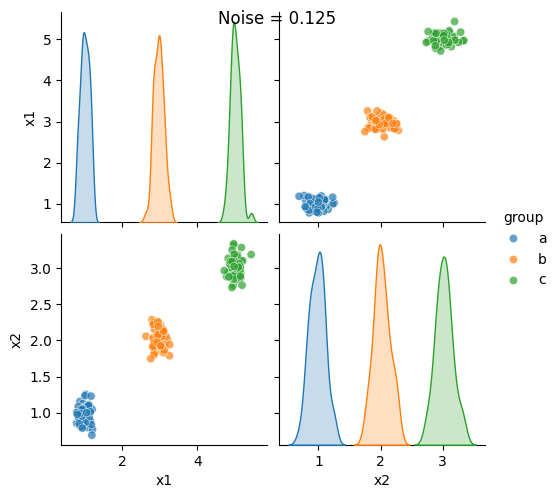

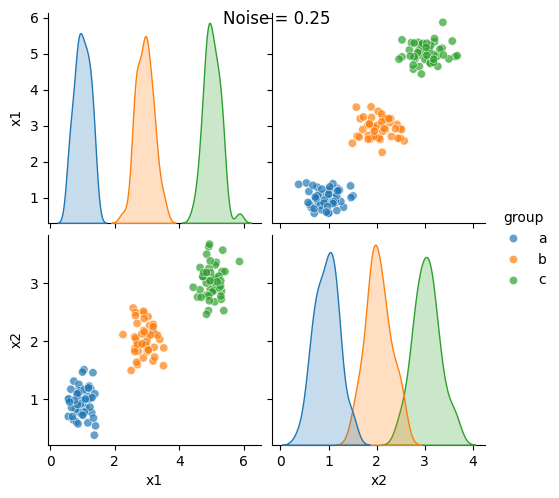

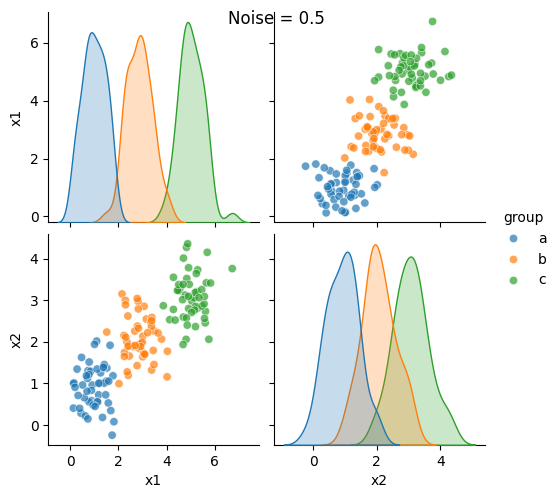

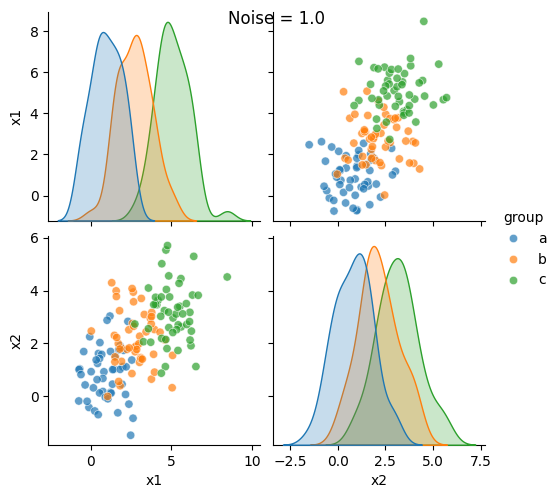

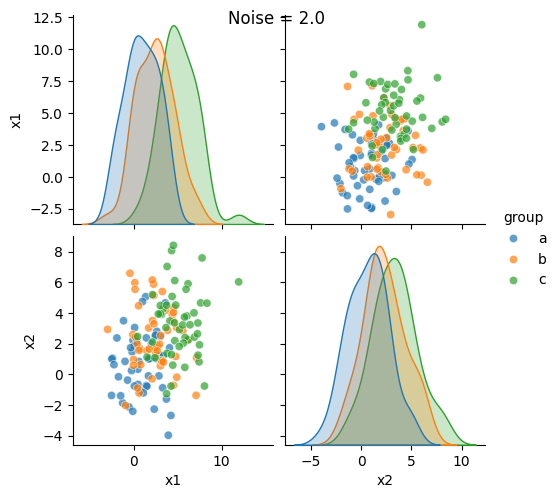

In [26]:
data = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise = [0.125, 0.25, 0.5, 1.0, 2.0]

# creating a pairplot for easy comparison of noise levels
for df, noise in zip(data, noise):
    sns.pairplot(df, hue="group", plot_kws={'alpha':0.7})
    plt.suptitle(f"Noise = {noise}")
    plt.show()

As the noise increases, we can obersve that the cluster groups become less obvious and overlap. More noise makes k-means clustering more difficult, as the cluster groups aren't as disctinct with higher noise levels.

In [21]:
# 3
from sklearn.cluster import KMeans

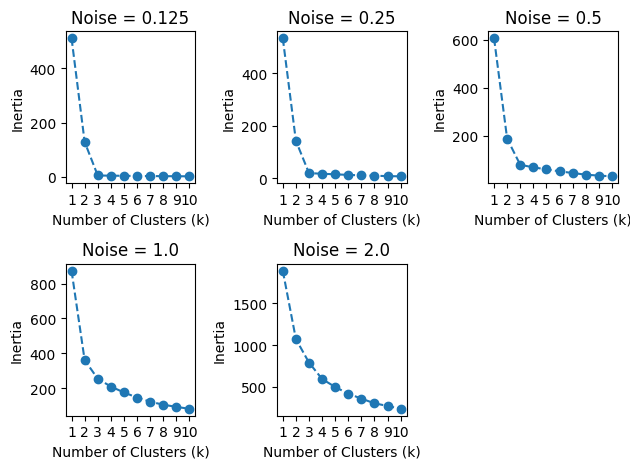

In [36]:
def compute_inertia(df):
    inertia = []  # creating an empty list to append to later
    X = df[['x1', 'x2']].values
    for k in range(1, 11):  # trying k values from 1-10
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=100)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)  # appending calculated inertia to inertia list
    return inertia

data = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise = [0.125, 0.25, 0.5, 1.0, 2.0]

for i, (df, noise) in enumerate(zip(data, noise)):
    plt.subplot(2, 3, i+1)  # using same process as above to create the graphs in one image for comparison
    inertia = compute_inertia(df)
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.title(f'Noise = {noise}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

As noise increases, the scree or elbow plot becomes more curved, making it more difficult to find the optimal k-value, as we aim to select a k-value based on where the graph looks like it has an "elbow" or a sharp change in direction, and it becomes more difficult to identify when the graph is curved.

In [ ]:
# 3

While we want to minimize the inertia value, or the within cluster sum of squared errors, we also want to make sure our k value isn't too high and overfits the data. So, we aim for a balance between k-value and inertia by picking the optimal balance between k and inertia values. Before the "elbow" in the graph, we have significant changes and decreases in the inertia values. After the elbow, the changes or difference in inertia aren't as significant, so picking the "elbow" point assures that the k value optimally groups the data without overfitting and taking into account smaller inertia changes.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

In [76]:
# 1
df = pd.read_csv('SIPRI Military Expenditure Database.csv')
df.head()

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
0,0,1988,Afghanistan,NaN,NaN,NaN,NaN
1,1,1989,Afghanistan,NaN,NaN,NaN,NaN
2,2,1990,Afghanistan,NaN,NaN,NaN,NaN
3,3,1991,Afghanistan,NaN,NaN,NaN,NaN
4,4,1992,Afghanistan,NaN,NaN,NaN,NaN


In [82]:
df_2020 = df[df['Year'] == 2020]
df_2020 = df_2020.dropna()
print(f"num countries in 2020: {len(df_2020)}")
print(df_2020.head())

num countries in 2020: 148
     index  Year      Country  Spending (2020 USD)  Percent of GDP  \
32      32  2020  Afghanistan           279.576955        0.013589   
66      66  2020      Albania           187.433234        0.012583   
100    100  2020      Algeria          9708.277440        0.066600   
134    134  2020       Angola           993.594405        0.014442   
168    168  2020    Argentina          2830.929705        0.007269   

     Percent of Government Spending  Spending per Capita  
32                         0.049728             7.181899  
66                         0.037952            65.126211  
100                        0.173924           221.392384  
134                        0.074624            30.231680  
168                        0.017268            62.636731  


In [83]:
# 2
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [84]:
scaler = MinMaxScaler() #3 normalizing the specified variables
df_2020[['Spending (2020 USD)', 'Spending per Capita']] = scaler.fit_transform(df_2020[['Spending (2020 USD)', 'Spending per Capita']])
print(df_2020[['Country', 'Spending (2020 USD)', 'Spending per Capita']].head())

         Country  Spending (2020 USD)  Spending per Capita
32   Afghanistan             0.000348             0.002620
66       Albania             0.000230             0.025615
100      Algeria             0.012461             0.087630
134       Angola             0.001265             0.011767
168    Argentina             0.003626             0.024627


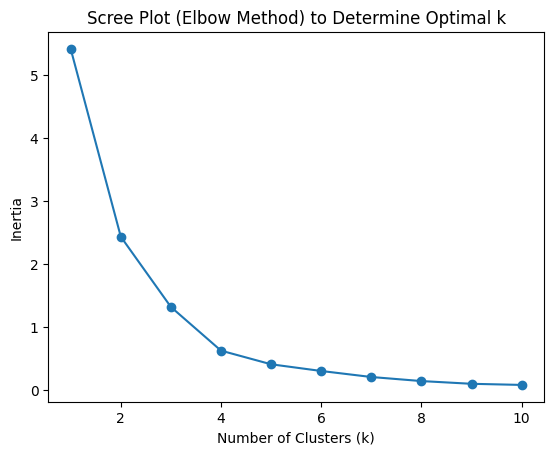

In [86]:
inertia = []
X = df_2020[['Spending (2020 USD)', 'Spending per Capita']].values

# assigning range of k values to loop through and create skree plot
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Scree Plot (Elbow Method) to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Optimal k appears to be 4 ^

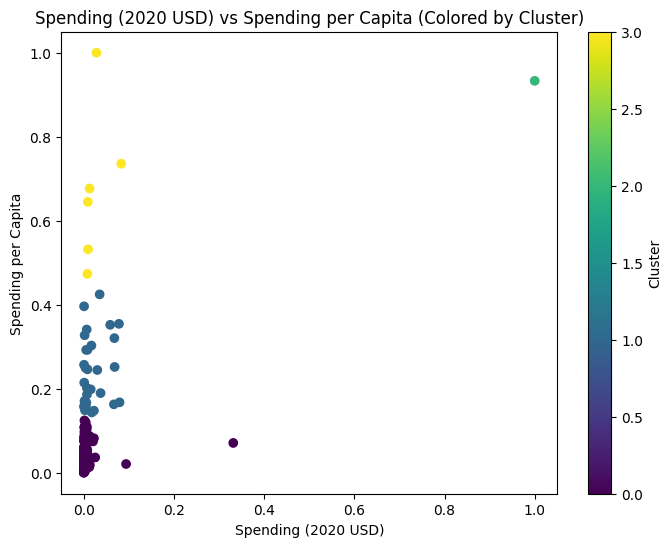

In [87]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=100)
df_2020['Cluster'] = kmeans.fit_predict(X)

plt.scatter(df_2020['Spending (2020 USD)'], df_2020['Spending per Capita'], c=df_2020['Cluster'], cmap='viridis')
plt.title('Spending (2020 USD) vs Spending per Capita (Colored by Cluster)')
plt.xlabel('Spending (2020 USD)')
plt.ylabel('Spending per Capita')
plt.colorbar(label='Cluster')
plt.show()

In [88]:
df_2020.groupby('Cluster')[['Spending (2020 USD)', 'Spending per Capita']].describe()

Spending (2020 USD)                                                   \
                      count      mean       std      min       25%       50%   
Cluster                                                                        
0                     111.0  0.006232  0.032639  0.00000  0.000156  0.000480   
1                      30.0  0.021929  0.026443  0.00051  0.002936  0.007514   
2                       1.0  1.000000       NaN  1.00000  1.000000  1.000000   
3                       6.0  0.024968  0.029370  0.00782  0.009012  0.011069   

                            Spending per Capita                                \
              75%       max               count      mean       std       min   
Cluster                                                                         
0        0.002940  0.331409               111.0  0.031542  0.033138  0.000000   
1        0.033772  0.079271                30.0  0.240850  0.082121  0.143616   
2        1.000000  1.000000                 1.0  0.933024       NaN  0.933024   
3        0.024215  0.082927                 6.0  0.677089  0.185083  0.473454   

                                                 
              25%       50%       75%       max  
Cluster                                          
0        0.005675  0.018445  0.049530  0.124462  
1        0.167325  0.229550  0.300319  0.424651  
2        0.933024  0.933024  0.933024  0.933024  
3        0.560161  0.660709  0.720941  1.000000

In [93]:
us_data = df_2020[df_2020['Country'] == 'United States of America']

print(us_data[['Country', 'Spending (2020 USD)', 'Spending per Capita', 'Cluster']])

cluster_means = df_2020.groupby('Cluster')[['Spending (2020 USD)', 'Spending per Capita']].mean()
print(cluster_means)

                       Country  Spending (2020 USD)  Spending per Capita  \
5540  United States of America                  1.0             0.933024   

      Cluster  
5540        2  
         Spending (2020 USD)  Spending per Capita
Cluster                                          
0                   0.006232             0.031542
1                   0.021929             0.240850
2                   1.000000             0.933024
3                   0.024968             0.677089


The United States belongs in cluster group 2,  and it appears to be in its own cluster group by itself because it is such an outliar.

In [95]:
# 3
df_2020[['Percent of Government Spending', 'Percent of GDP']] = scaler.fit_transform(df_2020[['Percent of Government Spending', 'Percent of GDP']])
df_2020[['Country', 'Percent of Government Spending', 'Percent of GDP']].head()

,Country,Percent of Government Spending,Percent of GDP
32,Afghanistan,0.150377,0.137524
66,Albania,0.110877,0.127303
100,Algeria,0.566960,0.676168
134,Angola,0.233882,0.146191
168,Argentina,0.041498,0.073306


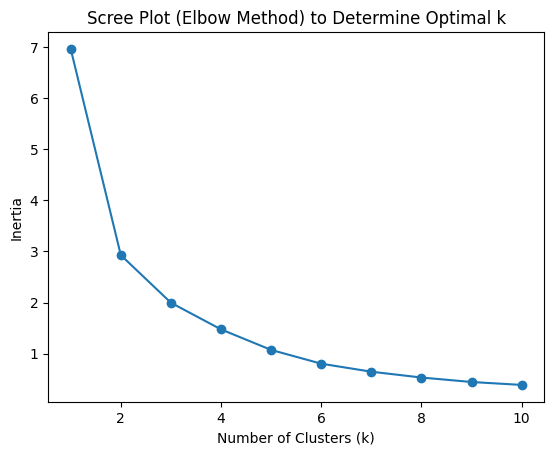

In [96]:
inertia = []
X = df_2020[['Percent of Government Spending', 'Percent of GDP']].values

# assigning range of k values to loop through and create skree plot
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Scree Plot (Elbow Method) to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

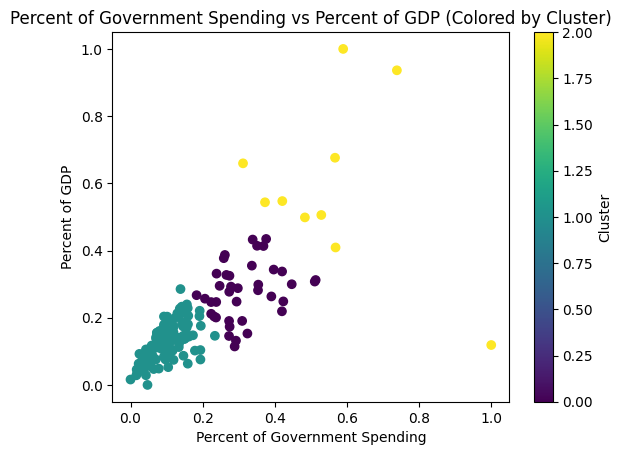

In [99]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=100)
df_2020['Cluster'] = kmeans.fit_predict(X)

plt.scatter(df_2020['Percent of Government Spending'], df_2020['Percent of GDP'], c=df_2020['Cluster'], cmap='viridis')
plt.title('Percent of Government Spending vs Percent of GDP (Colored by Cluster)')
plt.xlabel('Percent of Government Spending')
plt.ylabel('Percent of GDP')
plt.colorbar(label='Cluster')
plt.show()

In [100]:
df_2020.groupby('Cluster')[['Percent of Government Spending', 'Percent of GDP']].describe()

Percent of Government Spending                                \
                                 count      mean       std       min   
Cluster                                                                
0                                 39.0  0.314582  0.080920  0.183219   
1                                 99.0  0.103582  0.048799  0.000000   
2                                 10.0  0.558119  0.196977  0.311897   

                                                Percent of GDP            \
              25%       50%       75%       max          count      mean   
Cluster                                                                    
0        0.260067  0.292315  0.361373  0.513270           39.0  0.277982   
1        0.070522  0.098495  0.142575  0.233882           99.0  0.128133   
2        0.436433  0.547920  0.584256  1.000000           10.0  0.589502   

                                                                     
              std       min       25%       50%       75%       max  
Cluster                                                              
0        0.083228  0.114445  0.215412  0.281733  0.329289  0.434443  
1        0.057728  0.000000  0.084730  0.133481  0.169669  0.285294  
2        0.252671  0.118758  0.500357  0.545385  0.672003  1.000000

In [102]:
find_us = df_2020[df_2020['Country'] == 'United States of America']

print(find_us[['Country', 'Percent of Government Spending', 'Percent of GDP', 'Cluster']])

cluster_means_new = df_2020.groupby('Cluster')[['Percent of Government Spending', 'Percent of GDP']].mean()
print(cluster_means_new)

                       Country  Percent of Government Spending  \
5540  United States of America                        0.258544   

      Percent of GDP  Cluster  
5540        0.377222        0  
         Percent of Government Spending  Percent of GDP
Cluster                                                
0                              0.314582        0.277982
1                              0.103582        0.128133
2                              0.558119        0.589502


In this example, the US seems to be in cluster group 0 with many other countries, which is different to the other scatterplot showing the United States as an outlier in its own cluster group.

In [103]:
# 4
kmeans_all = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=100)
df_2020['Cluster_all'] = kmeans_all.fit_predict(df_2020[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']])

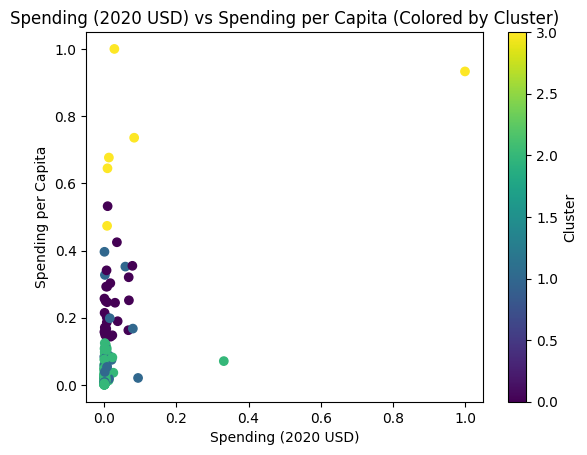

In [104]:
plt.scatter(df_2020['Spending (2020 USD)'], df_2020['Spending per Capita'], c=df_2020['Cluster_all'], cmap='viridis')
plt.title('Spending (2020 USD) vs Spending per Capita (Colored by Cluster)')
plt.xlabel('Spending (2020 USD)')
plt.ylabel('Spending per Capita')
plt.colorbar(label='Cluster')
plt.show()

This scatterplot is more complex and has groups that appear to overlap

In [ ]:
# 5

By using more variables in the k means clustering we can observe that the data cluster tend to overlap more rather than providing more distinct clusters. The clusters are probably more visible in higher dimensions which is why we aren't able to see it here.

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?